Connected to Python 3.9.6

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from parsedata import *
from CLVModel import *

In [2]:
# Build dictionary from a specified sheet
# Separating CW6 and CW8 data
cw6dict = {}
cw8dict = {}
sheet = r"C:\Users\tyler\Downloads\updated_hsc_summary.xlsx"
readdata(sheet, cw8dict, "CW8_WBM")
readdata(sheet, cw8dict, "CW8_PB")

Making new CHData 337b
Making new CHData 337c
Making new CHData 337d
Making new CHData 345a
Making new CHData 345b
Making new CHData 345c
Making new CHData 345d
Making new CHData 346b
Making new CHData 346c
Making new CHData 346d
Making new CHData 349c
Making new CHData 349d
Making new CHData 354a
Making new CHData 354b
Making new CHData 363a
Making new CHData 363b
Making new CHData 363c
Making new CHData 363d
Making new CHData 344a
Making new CHData 344b
Making new CHData 344c
Making new CHData 344d
Making new CHData 347b
Making new CHData 347c
Making new CHData 349b
Making new CHData 360a
Making new CHData 360b
Making new CHData 360c
Making new CHData 360d
Making new CHData 361a
Making new CHData 361b
Making new CHData 362b
Making new CHData 362c
Making new CHData 362d
Making new CHData 365a
Making new CHData 365b
Making new CHData 346a
Making new CHData 354c
Making new CHData 354d
Making new CHData 357a
Making new CHData 357b
Making new CHData 357c
Making new CHData 357d
Making new 

In [3]:
# partition CW8 data into two groups (treat & control), and also discard data that is not 2X and does not have all 3 data points
control8dict = {}
for key in cw8dict.keys():
    if cw8dict[key].type.lower() != "2x":
        pass
    elif cw8dict[key].treatment.lower() != "control":
        pass
    elif len(cw8dict[key].data) != 3:
        pass
    else:
        control8dict[key] = cw8dict[key]

treat8dict = {}
for key in cw8dict.keys():
    if cw8dict[key].treatment.lower() == "control":
        pass
    elif cw8dict[key].type.lower() != "2x":
        pass
    elif len(cw8dict[key].data) == 3:
        treat8dict[key] = cw8dict[key]

In [4]:
# Optimize the control dicts
for key in control8dict.keys():
    control8dict[key].optimize()

# Now optimize the treatment dicts
treat8tracker = []
for key in treat8dict.keys():
    treat8tracker.append(do_treat_CLVopt(treat8dict[key], verbose=False, controldict=control8dict))

[ 0.03760683  0.09554014  0.12138185  0.0033324   0.00475206  0.00449715
 -0.00488578  0.0050316   0.00544373]
[ 1.          0.0033324   0.00475206  0.00449715  1.         -0.00488578
  0.0050316   0.00544373  1.        ]
[ 0.63066182  0.43476372  0.71588235 -0.9202038  -0.072121   -0.20447758
 -0.13799183 -0.38965844  1.21468532]
[ 1.         -0.9202038  -0.072121   -0.20447758  1.         -0.13799183
 -0.38965844  1.21468532  1.        ]
[ 0.25869312  0.15949056  0.44400771 -0.11442081 -0.50963585 -1.61582537
 -0.38604995  1.80349603  0.65285545]
[ 1.         -0.11442081 -0.50963585 -1.61582537  1.         -0.38604995
  1.80349603  0.65285545  1.        ]
[ 0.30415776  0.38544525  0.5930533   2.08886927 -0.85921678 -0.33691456
 -0.57198598 -0.57814833  0.00699052]
[ 1.          2.08886927 -0.85921678 -0.33691456  1.         -0.57198598
 -0.57814833  0.00699052  1.        ]
[ 8.60727626e-09  4.71180096e-02  1.86321778e-01 -5.68739431e-03
 -7.58096871e-04  2.20472693e-04  3.14177591e-0

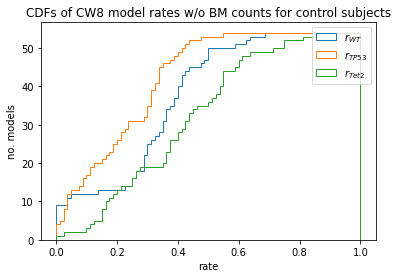

In [5]:
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1,1,1)
ax.hist([control8dict[key].rates[0] for key in control8dict.keys()], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{WT}$")
ax.hist([control8dict[key].rates[1] for key in control8dict.keys()], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{TP53}$")
ax.hist([control8dict[key].rates[2] for key in control8dict.keys()], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{Tet2}$")
ax.set(xlabel="rate", ylabel="no. models", title="CDFs of CW8 model rates w/o BM counts for control subjects")
ax.legend()

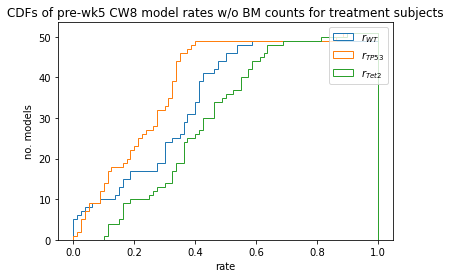

In [6]:
fig = plt.figure(num=2, clear=True)
ax = fig.add_subplot(1,1,1)
ax.hist([treat8tracker[i][0][0] for i in range(len(treat8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{WT}$")
ax.hist([treat8tracker[i][0][1] for i in range(len(treat8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{TP53}$")
ax.hist([treat8tracker[i][0][2] for i in range(len(treat8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{Tet2}$")
ax.set(xlabel="rate", ylabel="no. models", title="CDFs of pre-wk5 CW8 model rates w/o BM counts for treatment subjects")
ax.legend()

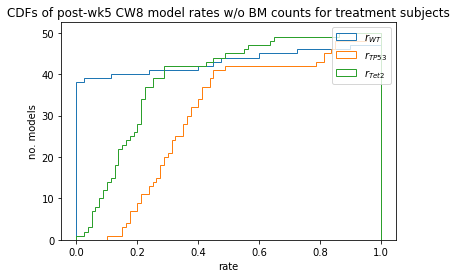

In [7]:
fig = plt.figure(num=3, clear=True)
ax = fig.add_subplot(1,1,1)
ax.hist([treat8tracker[i][2][0] for i in range(len(treat8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{WT}$")
ax.hist([treat8tracker[i][2][1] for i in range(len(treat8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{TP53}$")
ax.hist([treat8tracker[i][2][2] for i in range(len(treat8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{Tet2}$")
ax.set(xlabel="rate", ylabel="no. models", title="CDFs of post-wk5 CW8 model rates w/o BM counts for treatment subjects")
ax.legend()

In [8]:
# Now add BM counts & reoptimize
add_bm_counts(sheet, cw8dict, "CW8_BM_counts", "CW8_HSC")

controlBM8dict = {}
for key in cw8dict.keys():
    if cw8dict[key].type.lower() != "2x":
        pass
    elif cw8dict[key].treatment.lower() != "control":
        pass
    elif len(cw8dict[key].data) != 3:
        pass
    else:
        controlBM8dict[key] = cw8dict[key]

treatBM8dict = {}
for key in cw8dict.keys():
    if cw8dict[key].treatment.lower() == "control":
        pass
    elif cw8dict[key].type.lower() != "2x":
        pass
    elif len(cw8dict[key].data) == 3:
        treatBM8dict[key] = cw8dict[key]

for key in controlBM8dict.keys():
    controlBM8dict[key].optimize()

treatBM8tracker = []
for key in treatBM8dict.keys():
    treatBM8tracker.append(do_treat_CLVopt(treatBM8dict[key], verbose=False, controldict=controlBM8dict))

[ 2.65215080e-01  3.02260640e-01  3.20158556e-01  6.74717026e-04
  3.25156175e-03  2.26876514e-03  1.44627022e-03  1.30686790e-03
 -2.00317315e-04]
[ 1.00000000e+00  6.74717026e-04  3.25156175e-03  2.26876514e-03
  1.00000000e+00  1.44627022e-03  1.30686790e-03 -2.00317315e-04
  1.00000000e+00]
[0.19587689 0.29679438 0.30517751 0.00094572 0.00479419 0.00170766
 0.00428147 0.01070767 0.00211914]
[1.00000000e+00 9.45721340e-04 4.79418563e-03 1.70765660e-03
 1.00000000e+00 4.28146601e-03 1.07076657e-02 2.11914149e-03
 1.00000000e+00]
[ 0.07676677  0.02967745  0.17298789  0.00188077  0.0291304  -0.00313002
 -0.03019691 -0.02302165  0.03397798]
[ 1.          0.00188077  0.0291304  -0.00313002  1.         -0.03019691
 -0.02302165  0.03397798  1.        ]
[ 0.09241322  0.25992139  0.31149578 -0.00073341 -0.00356742  0.00486362
  0.00765092 -0.00185694  0.00175141]
[ 1.00000000e+00 -7.33405192e-04 -3.56741506e-03  4.86361926e-03
  1.00000000e+00  7.65091539e-03 -1.85693801e-03  1.75140731e-03


c:\Users\tyler\CHModeling\CLVModel.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  adjnloss = sum(nlvect)/chdata.data[-1].bmcount**2 # square this to match squared error
c:\Users\tyler\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


[1. 1. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 1.]
[ 5.52209399e-01  4.06414500e-01  3.90966441e-01 -7.95632700e-04
  5.64416611e-03  2.59954675e-03 -2.03427819e-03  2.40863519e-04
 -6.61748620e-04]
[ 1.00000000e+00 -7.95632700e-04  5.64416611e-03  2.59954675e-03
  1.00000000e+00 -2.03427819e-03  2.40863519e-04 -6.61748620e-04
  1.00000000e+00]
[ 0.32686448  0.28935097  0.39262261  0.88543825  0.45934475  0.55134271
 -0.72051808 -0.70956382 -0.65313938]
[ 1.          0.88543825  0.45934475  0.55134271  1.         -0.72051808
 -0.70956382 -0.65313938  1.        ]
[ 0.34388614  0.29353277  0.4834018  -0.14772101 -0.22990873 -0.12219707
 -0.00246044  1.23267047 -0.70317804]
[ 1.         -0.14772101 -0.22990873 -0.12219707  1.         -0.00246044
  1.23267047 -0.70317804  1.        ]
[ 0.21865082  0.08860953  0.44525084 -3.21078979 -1.87680334 -0.11595721
  3.79589455  1.54978766  0.64709358]
[ 1.         -3.21078979 -1.87680334 -0.11595721  1.          3.79589455
  1.54978766  0.64

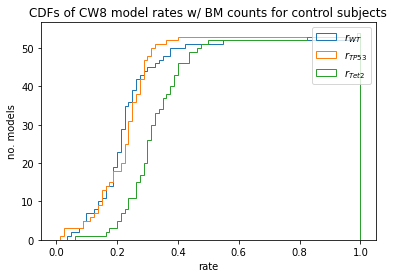

In [9]:
fig = plt.figure(num=4, clear=True)
ax = fig.add_subplot(1,1,1)
plt.hist([controlBM8dict[key].rates[0] for key in controlBM8dict.keys()], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{WT}$")
plt.hist([controlBM8dict[key].rates[1] for key in controlBM8dict.keys()], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{TP53}$")
plt.hist([controlBM8dict[key].rates[2] for key in controlBM8dict.keys()], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{Tet2}$")
ax.set(xlabel="rate", ylabel="no. models", title="CDFs of CW8 model rates w/ BM counts for control subjects")
ax.legend()

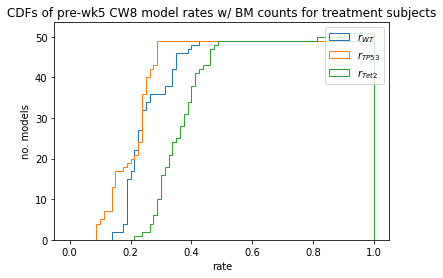

In [10]:
fig = plt.figure(num=5, clear=True)
ax = fig.add_subplot(1,1,1)
plt.hist([treatBM8tracker[i][0][0] for i in range(len(treatBM8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{WT}$")
plt.hist([treatBM8tracker[i][0][1] for i in range(len(treatBM8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{TP53}$")
plt.hist([treatBM8tracker[i][0][2] for i in range(len(treatBM8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{Tet2}$")
ax.set(xlabel="rate", ylabel="no. models", title="CDFs of pre-wk5 CW8 model rates w/ BM counts for treatment subjects")
ax.legend()

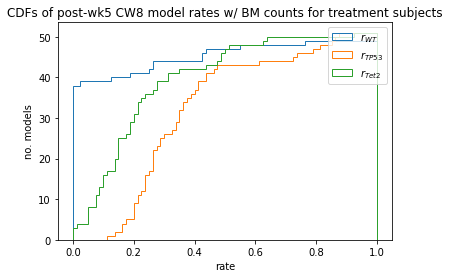

In [11]:
fig = plt.figure(num=6, clear=True)
ax = fig.add_subplot(1,1,1)
plt.hist([treatBM8tracker[i][2][0] for i in range(len(treatBM8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{WT}$")
plt.hist([treatBM8tracker[i][2][1] for i in range(len(treatBM8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{TP53}$")
plt.hist([treatBM8tracker[i][2][2] for i in range(len(treatBM8tracker))], cumulative=True, histtype="step", bins=80, range=(0,1), label="$r_{Tet2}$")
ax.set(xlabel="rate", ylabel="no. models", title="CDFs of post-wk5 CW8 model rates w/ BM counts for treatment subjects")
ax.legend()

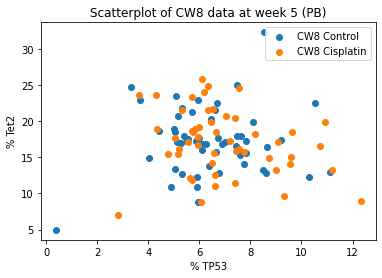

In [37]:
# Plot CW6 controls and treatment; then CW8 controls and treatment
# Order is WT, TP53, Tet2
fig1 = plt.figure(num=7, clear=True)
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter([control8dict[key].data[0].probs[1] for key in control8dict.keys()],[control8dict[key].data[0].probs[2] for key in control8dict.keys()], label="CW8 Control")
ax1.scatter([treat8dict[key].data[0].probs[1] for key in treat8dict.keys()],[treat8dict[key].data[0].probs[2] for key in treat8dict.keys()], label="CW8 Cisplatin")
ax1.set(title="Scatterplot of CW8 data at week 5 (PB)", xlabel="% TP53", ylabel="% Tet2")
ax1.legend()

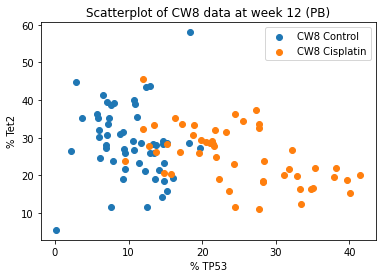

In [36]:
fig2 = plt.figure(num=8, clear=True)
ax2 = fig2.add_subplot(1,1,1)
ax2.scatter([control8dict[key].data[1].probs[1] for key in control8dict.keys()],[control8dict[key].data[1].probs[2] for key in control8dict.keys()], label="CW8 Control")
ax2.scatter([treat8dict[key].data[1].probs[1] for key in treat8dict.keys()],[treat8dict[key].data[1].probs[2] for key in treat8dict.keys()], label="CW8 Cisplatin")
ax2.set(title="Scatterplot of CW8 data at week 12 (PB)", xlabel="% TP53", ylabel="% Tet2")
ax2.legend()

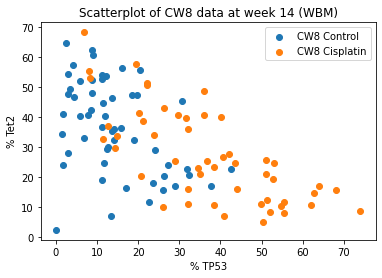

In [35]:
fig3 = plt.figure(num=8, clear=True)
ax3 = fig3.add_subplot(1,1,1)
ax3.scatter([control8dict[key].data[2].probs[1] for key in control8dict.keys()],[control8dict[key].data[2].probs[2] for key in control8dict.keys()], label="CW8 Control")
ax3.scatter([treat8dict[key].data[2].probs[1] for key in treat8dict.keys()],[treat8dict[key].data[2].probs[2] for key in treat8dict.keys()], label="CW8 Cisplatin")
ax3.set(title="Scatterplot of CW8 data at week 14 (WBM)", xlabel="% TP53", ylabel="% Tet2")
ax3.legend()

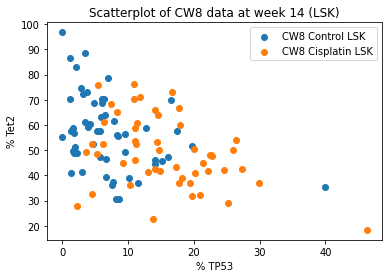

In [6]:
import pandas as pd
df = pd.read_excel(r"C:\Users\tyler\Downloads\updated_hsc_summary.xlsx", sheet_name="CW8_HSC")
LSK_data_control = []
LSK_data_cisplatin = []
for index, row in df.iterrows():
    if row["Treatment"] == "Cisplatin":
        LSK_data_cisplatin.append([row["LSK Tet2"], row["LSK TP53"], row["LSK WT"]])
    else:
        LSK_data_control.append([row["LSK Tet2"], row["LSK TP53"], row["LSK WT"]])
LSK_data_control = np.array(LSK_data_control)
LSK_data_cisplatin = np.array(LSK_data_cisplatin)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(LSK_data_control[:,1], LSK_data_control[:,2], label="CW8 Control LSK")
ax.scatter(LSK_data_cisplatin[:,1], LSK_data_cisplatin[:,2], label="CW8 Cisplatin LSK")
ax.set(title="Scatterplot of CW8 data at week 14 (LSK)", xlabel="% TP53", ylabel="% Tet2")
ax.legend()
